In [4]:
import zipfile
import PIL
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')


from PIL import ImageDraw

Enter the word: Christopher
Results found in file a-0.png


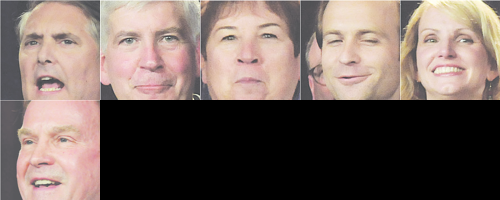

Results found in file a-3.png


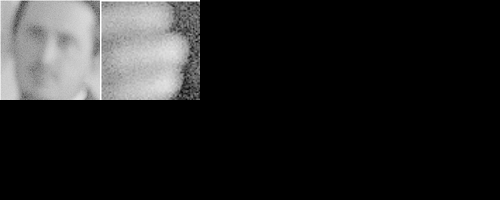

In [5]:
word = str(input('Enter the word: ' ))
#word = word.lower()

zf = zipfile.ZipFile('readonly/small_img.zip','r')
zf.extractall()

name_images = []

for x in zf.namelist():

    name_images.append(x)
    
for x in name_images:
    img = Image.open(x)
    img = img.convert('L')
    text = pytesseract.image_to_string(img).replace('-\n','')
    #text = text.lower()
    if word in text:
        print('Results found in file {}'.format(x))
        img1 = cv.imread(x)
        gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.35, minNeighbors=6,minSize=(30,30))
        pil_img=Image.open(x)
        drawing=ImageDraw.Draw(pil_img)
        lst = []
        for x,y,w,h in faces:
            drawing.rectangle((x,y,x+w,y+h), outline="white")
            face_i = pil_img.crop((x,y,x+w,y+h))
            
            face_i = face_i.resize((100, 100))
            lst.append(face_i)
            
        try:    
            first_image=lst[0]
        
    
            contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*5,first_image.height*2))
            x=0
            y=0
            for img in lst:
                contact_sheet.paste(img, (x, y) )
                if x+first_image.width == contact_sheet.width:
                    x=0
                    y=y+first_image.height
                else:
                    x=x+first_image.width

            contact_sheet = contact_sheet.resize((int(contact_sheet.width),int(contact_sheet.height) ))
            display(contact_sheet)
            
        except IndexError: 
            print('But there were no faces in that file!')

    else:
        pass

Enter the word: Mark
Results found in file a-0.png


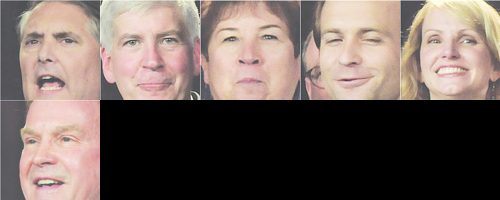

Results found in file a-1.png


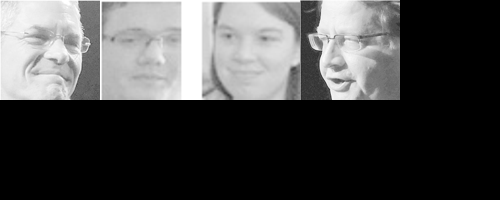

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


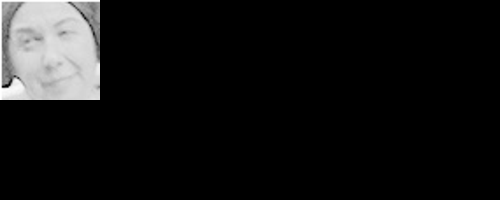

Results found in file a-2.png


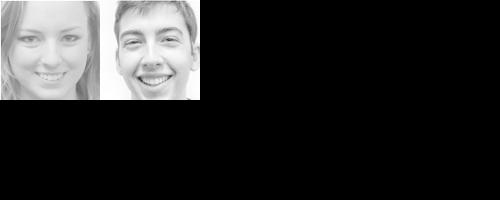

Results found in file a-3.png


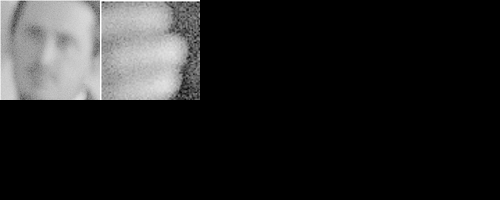

Results found in file a-8.png
But there were no faces in that file!


In [6]:
word = str(input('Enter the word: ' ))
#word = word.lower()

zf = zipfile.ZipFile('readonly/images.zip','r')
zf.extractall()
name_images = []

for x in zf.namelist():
    name_images.append(x)
    
for x in name_images:
    img = Image.open(x)
    img = img.convert('L')
    text = pytesseract.image_to_string(img).replace('-\n','')
    #text = text.lower()
    if word in text:
        print('Results found in file {}'.format(x))
        img1 = cv.imread(x)
        gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.352, minNeighbors=6,minSize=(30,30))
        pil_img=Image.open(x)
        drawing=ImageDraw.Draw(pil_img)
        
        lst = []
        for x,y,w,h in faces:
            drawing.rectangle((x,y,x+w,y+h), outline="white")
            face_i = pil_img.crop((x,y,x+w,y+h))
            
            face_i = face_i.resize((100, 100))
            lst.append(face_i)
            
        try:    
            first_image=lst[0]
        
    
            contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*5,first_image.height*2))
            x=0
            y=0
            for img in lst:
                contact_sheet.paste(img, (x, y) )
                if x+first_image.width == contact_sheet.width:
                    x=0
                    y=y+first_image.height
                else:
                    x=x+first_image.width

            contact_sheet = contact_sheet.resize((int(contact_sheet.width),int(contact_sheet.height) ))
            display(contact_sheet)
            
        except IndexError: 
            print('But there were no faces in that file!')

    else:
        pass